In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv('4liver.csv', delimiter = ',')

Вывод столбцов датафрейма

In [30]:
df.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset123'],
      dtype='object')

Перевод столбцов в нижний регистр

In [31]:
df.columns = df.columns.str.lower()

In [45]:
df.columns

Index(['age', 'gender', 'totalbilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'purpose'],
      dtype='object')

Переименование столбцов

In [32]:
df = df.rename(columns={'dataset123': 'purpose'})
df = df.rename(columns={'totalbilirubin': 'total_bilirubin'})

Нахождение и удаление пустых строк

In [33]:
df.isna().sum()

age                           0
gender                        0
totalbilirubin                2
direct_bilirubin              0
alkaline_phosphotase          1
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
purpose                       0
dtype: int64

In [34]:
df = df.dropna(subset=['totalbilirubin', 'alkaline_phosphotase', 
                       'albumin_and_globulin_ratio'])

In [35]:
df.isna().sum()

age                           0
gender                        0
totalbilirubin                0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
purpose                       0
dtype: int64

Нахождение и удаление явных дубликатов

In [36]:
df.duplicated().sum()

15

In [37]:
df = df.drop_duplicates()

In [38]:
df.drop_duplicates().reset_index()

,index,age,gender,totalbilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,purpose
0,0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
560,579,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1
561,580,52,Male,0.8,0.2,245.0,48,49,6.4,3.2,1.00,1
562,581,31,Male,1.3,0.5,184.0,29,32,6.8,3.4,1.00,1
563,582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2


In [39]:
df.duplicated().sum()

0

Нахождение и исправление неявных дубликатов

In [50]:
df['purpose'].unique()

array(['1', '2', 'yes'], dtype=object)

In [51]:
df.loc[df['purpose']=='yes', 'purpose'] = '1'
df['purpose'].unique()

array(['1', '2'], dtype=object)

In [52]:
df['aspartate_aminotransferase'].unique()

array(['18', '100', '68', '20', '59', '14', '12', '11', '19', '58', '56',
       '30', '41', '53', '441', '23', '245', '28', '34', '66', '55', '45',
       '731', '850', '21', '111', '44', '57', '80', '36', '77', '73',
       '50', '110', '47', '576', '15', '178', '27', '960', '406', '150',
       '61', '54', '24', '16', '43', '97', '86', '88', '95', '26', '17',
       '397', '29', '22', '127', '79', '142', '152', '31', '3a4', '350',
       '794', '400', '202', '630', '950', '161', '405', '92', '39', '10',
       '116', '98', '285', '64', '149', '2946', '1600', '1050', '275',
       '113', '84', '25', '40', '83', '65', '4929', '90', '140', '139',
       '87', '38', '42', '233', '138', '82', '35', '32', '187', '62',
       '74', '67', '37', '602', '63', '99', '103', '145', '247', '114',
       '104', '51', '60', '1500', '180', '148', '46', '13', '85', '231',
       '156', '89', '298', '48', '130', '75', '500', '105', '250', '232',
       '33', '143', '176', '70', '52', '91', '236', '108

In [54]:
df.loc[df['aspartate_aminotransferase']=='3a4', 'aspartate_aminotransferase'] = '314'
df['aspartate_aminotransferase'].unique()

array(['18', '100', '68', '20', '59', '14', '12', '11', '19', '58', '56',
       '30', '41', '53', '441', '23', '245', '28', '34', '66', '55', '45',
       '731', '850', '21', '111', '44', '57', '80', '36', '77', '73',
       '50', '110', '47', '576', '15', '178', '27', '960', '406', '150',
       '61', '54', '24', '16', '43', '97', '86', '88', '95', '26', '17',
       '397', '29', '22', '127', '79', '142', '152', '31', '314', '350',
       '794', '400', '202', '630', '950', '161', '405', '92', '39', '10',
       '116', '98', '285', '64', '149', '2946', '1600', '1050', '275',
       '113', '84', '25', '40', '83', '65', '4929', '90', '140', '139',
       '87', '38', '42', '233', '138', '82', '35', '32', '187', '62',
       '74', '67', '37', '602', '63', '99', '103', '145', '247', '114',
       '104', '51', '60', '1500', '180', '148', '46', '13', '85', '231',
       '156', '89', '298', '48', '130', '75', '500', '105', '250', '232',
       '33', '143', '176', '70', '52', '91', '236', '108

Смена типов данных 2 столбцов из object в int64  

In [55]:
df['aspartate_aminotransferase'] = pd.to_numeric(df['aspartate_aminotransferase'])
df['purpose'] = pd.to_numeric(df['purpose'])

Вывод информации о датафрейме

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   totalbilirubin              565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    int64  
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  purpose                     565 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 53.0+ KB


Построение точечной диаграммы

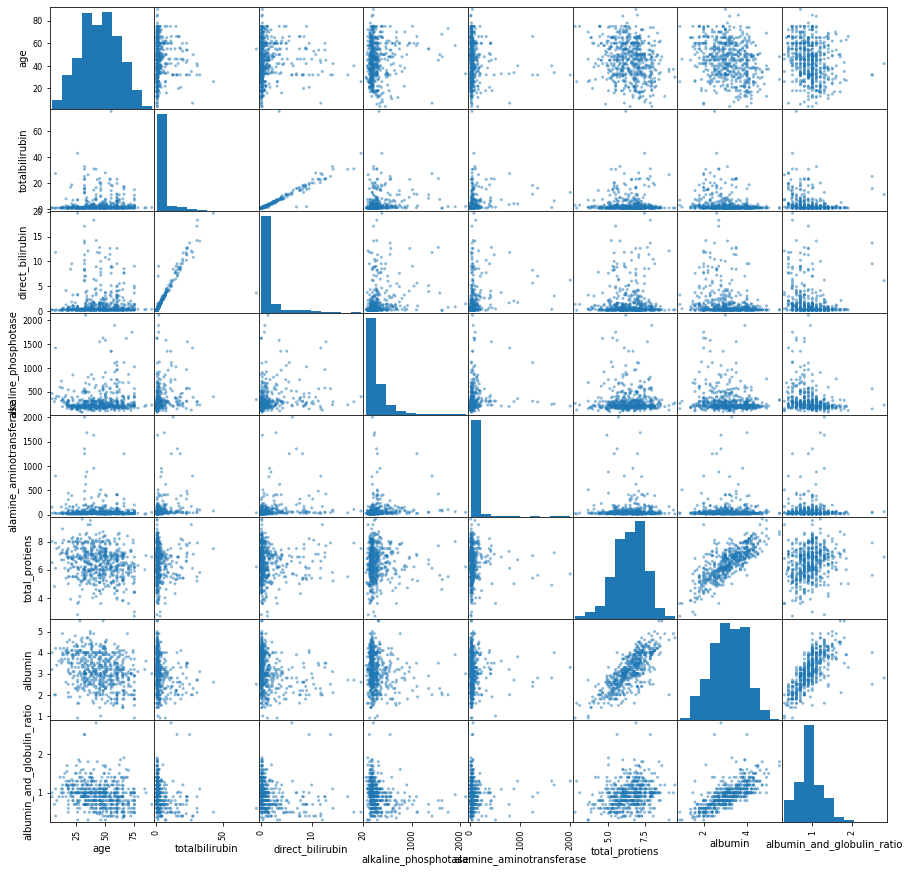

In [41]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

Оценка коэффициента корреляции 

In [42]:
df['age'].corr(df['total_protiens'])

-0.19599664168169317

In [43]:
df['age'].corr(df['albumin'])

-0.2724756936518857

In [44]:
df['age'].corr(df['albumin_and_globulin_ratio'])

-0.21963053227110113

Построение тепловой карты корреляции 

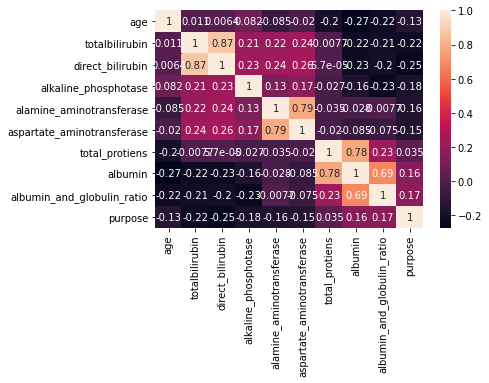

In [58]:
cols = ['age', 'totalbilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'purpose']
num = {} 
row = [] 
for col1 in cols: 
    row.clear() 
    for col2 in cols:  
        row.append(df[col1].corr(df[col2])) 
    num[col1] = np.array(row) 
 
df1 = pd.DataFrame(num, index=cols, columns=cols) 
sns.heatmap(df1, annot=True) 
plt.show()